This code is there in <a href="https://www.kaggle.com/code/aishwaryakarwal/mnist-pca-practice/edit">kaggle notebook

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv(r"/kaggle/input/digit-recognizer/train.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/digit-recognizer/train.csv'

In [3]:
df.shape

(42000, 785)

In [4]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5604,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5838,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12445,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26204,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33272,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.iloc[5838,1:].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   6,  76, 134, 200, 249, 202, 174,
        114,  81,  13,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

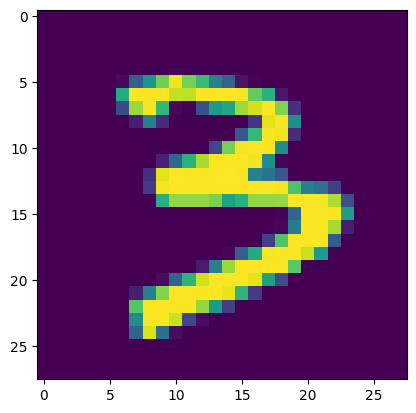

In [8]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[5838,1:].values.reshape(28,28))

## ml algo without pca

In [9]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=42)

In [11]:
xtrain.shape

(33600, 784)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [15]:
import time
start = time.time()
ypred = knn.predict(xtest)
print(time.time()-start)

11.983298301696777


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.9648809523809524

## ML modelling after PCA

In [27]:
# step 1 - standardize
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrainT = ss.fit_transform(xtrain)
xtestT = ss.transform(xtest)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
xtrainPC = pca.fit_transform(xtrainT)
xtestTPC = pca.transform(xtestT)

In [29]:
xtrainT.shape

(33600, 784)

In [30]:
xtrainPC.shape

(33600, 784)

In [31]:
pca = PCA(n_components = 200)
xtrainPC = pca.fit_transform(xtrainT)
xtestPC = pca.transform(xtestT)

In [33]:
xtrainT.shape

(33600, 784)

In [34]:
xtrainPC.shape

(33600, 200)

In [36]:
knn = KNeighborsClassifier()
knn.fit(xtrainPC,ytrain)
pred = knn.predict(xtestPC)
accuracy_score(ytest,pred)

0.9502380952380952

In [38]:
lst = []
for i in range(1,785):
    pca = PCA(n_components = i)
    xtrainPC = pca.fit_transform(xtrainT)
    xtestPC = pca.transform(xtestT)
    
    knn = KNeighborsClassifier()
    knn.fit(xtrainPC,ytrain)
    pred = knn.predict(xtestPC)
    acc = accuracy_score(ytest,pred)
    if(len(lst) != 0 and lst[-1][1] == acc):
        break
    else:
        lst.append((i, acc))
        
lst
    

[(1, 0.2580952380952381),
 (2, 0.3233333333333333),
 (3, 0.5103571428571428),
 (4, 0.666547619047619),
 (5, 0.7376190476190476),
 (6, 0.8226190476190476),
 (7, 0.8435714285714285),
 (8, 0.8720238095238095),
 (9, 0.8866666666666667),
 (10, 0.9054761904761904),
 (11, 0.9120238095238096),
 (12, 0.9186904761904762),
 (13, 0.9276190476190476),
 (14, 0.9345238095238095),
 (15, 0.9389285714285714),
 (16, 0.9373809523809524),
 (17, 0.9402380952380952)]

In [ ]:
#lstN = []
for i in range(1,785):
    pca = PCA(n_components = i)
    xtrainPC = pca.fit_transform(xtrainT)
    xtestPC = pca.transform(xtestT)
    
    knn = KNeighborsClassifier()
    knn.fit(xtrainPC,ytrain)
    pred = knn.predict(xtestPC)
    acc = accuracy_score(ytest,pred)
    if(len(lstN) != 0 and lstN[-1][1] > 96):
        break
    else:
        print((i,acc))
        

    

(1, 0.25666666666666665)
(2, 0.3242857142857143)
(3, 0.5105952380952381)
(4, 0.6664285714285715)
(5, 0.7376190476190476)
(6, 0.8227380952380953)
(7, 0.8435714285714285)
(8, 0.8717857142857143)
(9, 0.8870238095238095)
(10, 0.9058333333333334)
(11, 0.9119047619047619)
(12, 0.9182142857142858)
(13, 0.9266666666666666)
(14, 0.9341666666666667)
(15, 0.9389285714285714)
(16, 0.9383333333333334)
(17, 0.9404761904761905)
(18, 0.940952380952381)
(19, 0.9428571428571428)
(20, 0.944047619047619)
(21, 0.9444047619047619)
(22, 0.944047619047619)
(23, 0.9438095238095238)
(24, 0.9458333333333333)
(25, 0.9479761904761905)
(26, 0.9475)
(27, 0.9473809523809524)
(28, 0.9472619047619047)
(29, 0.9488095238095238)
(30, 0.9482142857142857)
(31, 0.9511904761904761)
(32, 0.9507142857142857)
(33, 0.950595238095238)
(34, 0.9497619047619048)
(35, 0.9517857142857142)
(36, 0.9514285714285714)
(37, 0.9514285714285714)
(38, 0.9513095238095238)
(39, 0.9511904761904761)
(40, 0.9536904761904762)
(41, 0.9519047619047619)

## 1st goal - reduce dimensionality - improve accuracy and reduce computation

## 2nd goal of pca - Visualization 

In [ ]:
# first taking only 2 principal components to get a 2d visualization
pca = PCA(n_components = 2)
xtraintrf = pca.fit_transform(xtrainT)
xtesttrf = pca.transform(xtestT)

In [ ]:
xtraintrf

In [ ]:
import plotly.express as px
ytraintrf = ytrain.astype(str)
fig = px.scatter(x = xtraintrf[:,0],
    y = xtraintrf[:,1],
    color = ytraintrf,
    color_discrete_sequence = px.colors.qualitative.G10
)
fig.show()

In [ ]:
# transforming to 3D so taking 3 PCs
pca = PCA(n_components = 3)
xtraintrf = pca.fit_transform(xtrainT)
xtesttrf = pca.transform(xtestT)

In [ ]:
ytraintrf = ytrain.astype(str)
fig = px.scatter_3D(df, x = xtraintrf[:,0], 
                   y=xtraintrf[:,1],
                   z=xtraintrf[:,2],
                   color = ytraintrf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

In [ ]:
pca.explained_variance_ # gives the eigen values

In [ ]:
pca.components_ # 

In [ ]:
pca.components_.shape